In [53]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd


In [67]:

# Definir la arquitectura de la red neuronal
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.activation = nn.Sigmoid()
        self.errors = []

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        return x
    
    def fit(self, X, Y, lr=0.1, epochs=100):
        criterion = nn.MSELoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=lr)

        # Entrenamiento del modelo
        for epoch in range(epochs):
            Y_pred = self.forward(X)

            optimizer.zero_grad()
            loss = criterion(Y_pred, Y)
            loss.backward()
            optimizer.step()

            self.errors.append(loss.item())
            if epoch % 1000 == 0:
                print('Epoch:', epoch, 'Loss:', loss.item())
        return self 
    
    def score(self, X, Y):
        Y_pred = self.forward(X).round()
        correct = (Y_pred == Y).float().sum()
        return correct / Y.numel()


In [78]:
def mostrar_error(errores):
    plt.figure(figsize=(3, 3))
    plt.plot(errores)
    plt.xlabel('Épocas')
    plt.ylabel('Error')
    plt.title('Evolución del Error')
    plt.show()


Epoch: 0 Loss: 0.25141221284866333
Predicciones:
Precision: tensor(1.)


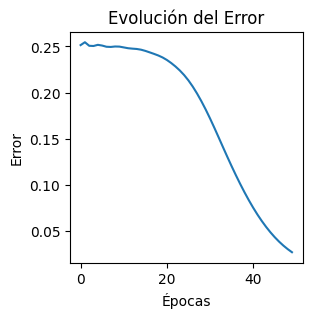

,predicciones,reales
0,0.0,0.0
1,1.0,1.0
2,1.0,1.0
3,0.0,0.0


In [88]:

# Datos de entrada y salida (Simula la compuerta XOR)
X = torch.tensor([
    [0, 0], 
    [0, 1], 
    [1, 0], 
    [1, 1]
    ], dtype=torch.float32)

Y = torch.tensor([
    [0], 
    [1], 
    [1], 
    [0]
    ], dtype=torch.float32)

# Crear el modelo
modelo = Net(2, 4, 1)
modelo.fit(X, Y,.1,50)
# Definir la función de pérdida y el optimizador

# Predicciones
print('Predicciones:')
resultado = pd.DataFrame({'predicciones': modelo(X).detach().numpy().round().flatten(), 'reales': Y.detach().numpy().flatten()})
print('Precision:', modelo.score(X, Y))

mostrar_error(modelo.errors)
resultado

Epoch: 0 Loss: 0.24842125177383423


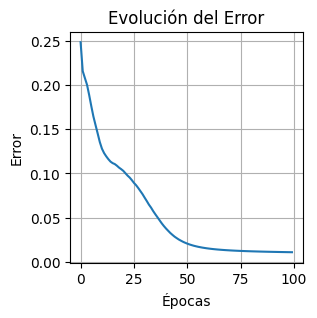

Precisión: tensor(0.9867)


In [ ]:

# Cargar los datos
datos = pd.read_csv('iris.csv')
X = datos.iloc[:, 0:4].values
Y = datos.iloc[:, 4].map({'Iris-setosa': [1,0,0], 'Iris-versicolor': [0,1,0], 'Iris-virginica': [0,0,1]}).apply(pd.Series).values
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.float32)

# Crear el modelo
modelo = Net(4, 10, 3)

# Entrenar el modelo
modelo.fit(X, Y, lr=0.1, epochs=100)


# Evaluar el modelo
print('Precisión:', modelo.score(X, Y))